In [9]:
headers2 = read.csv(file="sargento-meteo_14-18.csv", header = F, nrows = 1, as.is = T)
df_dist2 = read.csv(file="sargento-meteo_14-18.csv", skip = 3, header = F, stringsAsFactors=FALSE)
colnames(df_dist2)= headers2

In [10]:
require(lubridate)
df_dist2$NewDate <- as.POSIXct(paste0(df_dist2$TIMESTAMP, df_dist2$RECORD),format="%d/%m/%Y %H:%M")
df_dist2$NMonth <- factor(month(df_dist2$NewDate), 
                          labels = c("Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"))

In [11]:
df_dist2 <- subset(df_dist2, select=c("NewDate", "NMonth", "NR_Wm2_Avg", "AirTC_Avg" ))
names(df_dist2) <- c("Date", "Month", "NetRad", "AirTemp")
df_dist2$doy <- yday(df_dist2$Date)

In [12]:
library(lubridate) # For handling Date variables
library(ggplot2)
library(scales) # For percent_format()
library(RColorBrewer)
library(TTR) # for EMA (Exponential Moving Average)
library(cowplot)

In [13]:
library(plyr)
require(TTR)

SolarIrrad4b <- ddply(.data = df_dist2, .variables = .(yday(Date)), summarize,
      sum_DailyRad = sum(NetRad))

vec <- which(!complete.cases(SolarIrrad4b))  # rows 2305 2398
SolarIrrad <- SolarIrrad4b[-vec, ]

#        Datum sum_precip
SolarIrrad$EMA_sum_DailyRad <- EMA(SolarIrrad$sum_DailyRad, n=7, ratio=2/(5+1))
names(SolarIrrad) <- c("doy", "DailyRad", "EMA_DailyRad")

Warning message:
"Removed 6 rows containing missing values (geom_path)."

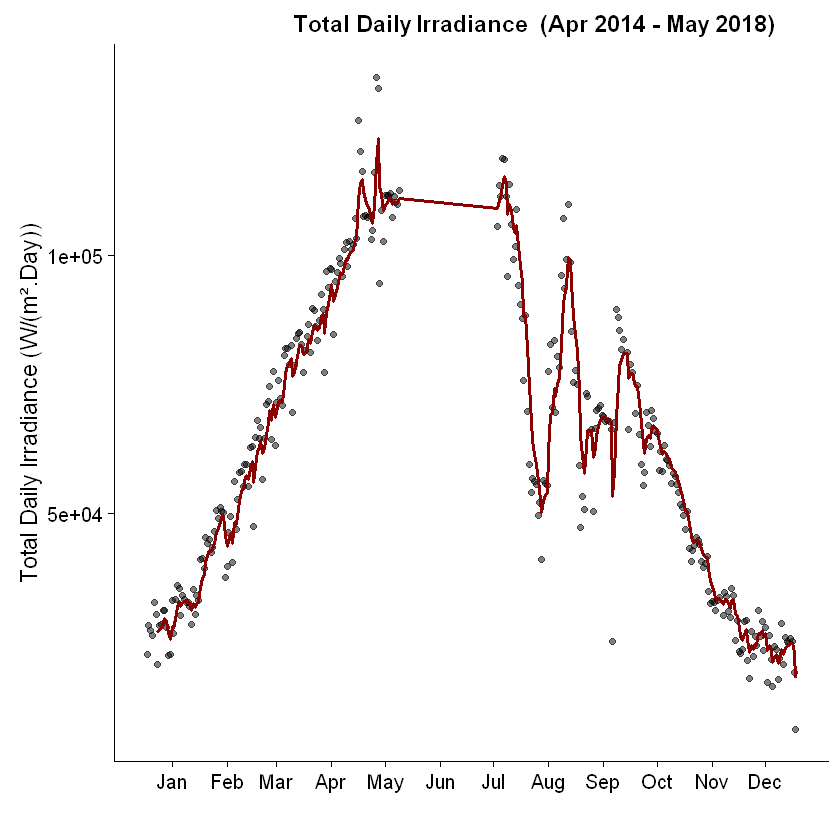

In [14]:
p <- ggplot(SolarIrrad, aes(x = doy)) + 
     scale_x_continuous(breaks=c(15,46,74,105,135,166,196,227,258,288,319,349),
                        labels=c("Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", 
                                 "Aug", "Sep", "Oct", "Nov", "Dec"))
p <- p + geom_point(data=SolarIrrad, aes(y=DailyRad), alpha = 1/2) +
       geom_line(data=SolarIrrad, aes(y=EMA_DailyRad), color='red4', size=1) +
       labs(x="", y="Total Daily Irradiance (W/(m².Day))") + ggtitle ("                     Total Daily Irradiance  (Apr 2014 - May 2018)")

p

In [15]:
# Average daily temperature
library(plyr)
require(TTR)

df_DailyTempx <- ddply(.data = df_dist2, .variables = .(yday(Date)), summarize,
      ave_AirTemp = mean(AirTemp))
vec <- which(!complete.cases(df_DailyTempx))  # rows 2305 2398
df_DailyTemp <- df_DailyTempx[-vec, ]
#        Datum sum_precip
df_DailyTemp$EMA_ave_airTemp <- EMA(df_DailyTemp$ave_AirTemp, n=7, ratio=2/(5+1))
names(df_DailyTemp) <- c("doy", "DailyTemp", "EMA_DailyTemp")


Warning message:
"Removed 6 rows containing missing values (geom_path)."

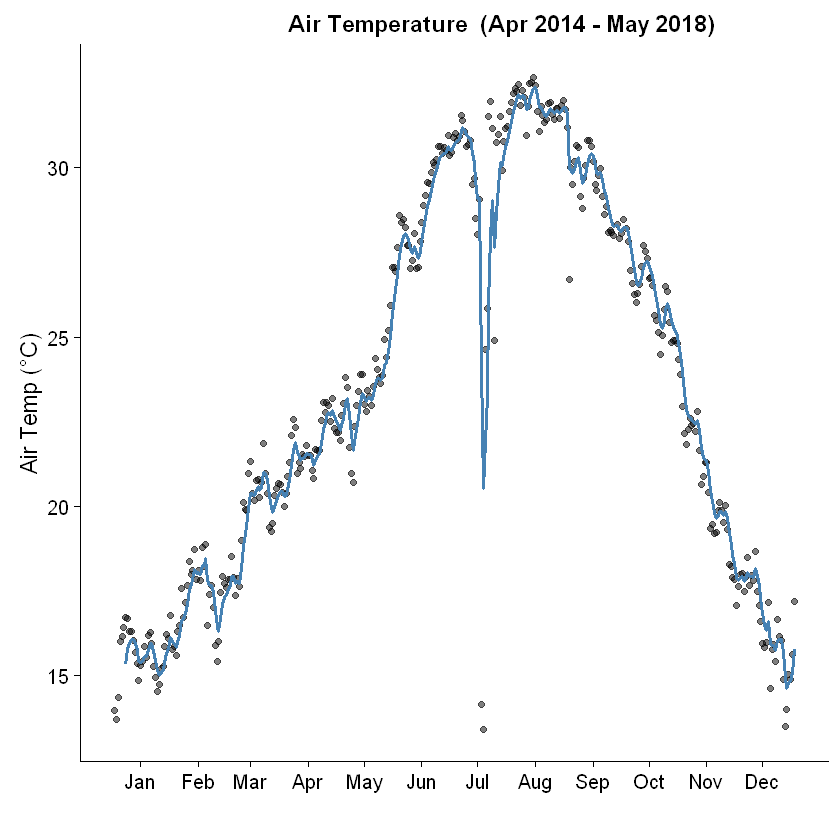

In [18]:
q <- ggplot(df_DailyTemp, aes(x = doy)) + 
     scale_x_continuous(breaks=c(15,46,74,105,135,166,196,227,258,288,319,349),
                        labels=c("Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", 
                                 "Aug", "Sep", "Oct", "Nov", "Dec"))
q <- q + geom_point(data=df_DailyTemp, aes(y=DailyTemp), alpha = 1/2) +
       geom_line(data=df_DailyTemp, aes(y=EMA_DailyTemp), color='steelblue', size=1) +
       labs(x="", y="Air Temp (°C)")+ ggtitle ("                Air Temperature  (Apr 2014 - May 2018)")
q